# DATA PREPROCESSING AND CLEANING

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("New.csv")
df.head()

,,age,weight1,history,HB,IFA,BP1,education,res,reslt
0,1,26.0,37.0,1.0,5.9,1,1.444444,5.0,1.0,0
1,1,21.0,42.0,1.0,9.2,1,1.375000,5.0,1.0,0
2,1,21.0,NaN,1.0,8.8,1,1.500000,5.0,1.0,0
3,1,21.0,NaN,1.0,9.2,1,2.125000,5.0,1.0,0
4,1,21.0,NaN,1.0,8.0,1,1.375000,5.0,1.0,0


In [3]:
df.isnull().sum()

              0
age           7
weight1      12
history       4
HB           19
IFA           0
BP1          15
education     3
res           2
reslt         0
dtype: int64

In [4]:
df['age'].fillna((df['age'].mean()), inplace=True)
df['weight1'].fillna((df['weight1'].mean()), inplace=True)
df['HB'].fillna((df['HB'].mean()), inplace=True)
df['BP1'].fillna((df['BP1'].mean()), inplace=True)
df['education'].fillna((df['education'].median()), inplace=True)
df['res'].fillna((df['res'].median()), inplace=True)
df['history'].fillna((df['history'].median()), inplace=True)

In [5]:
df['age'] = df['age'].astype(int)
#df1['age']
df.dtypes

               int64
age            int32
weight1      float64
history      float64
HB           float64
IFA            int64
BP1          float64
education    float64
res          float64
reslt          int64
dtype: object

In [6]:
df.isnull().sum()

             0
age          0
weight1      0
history      0
HB           0
IFA          0
BP1          0
education    0
res          0
reslt        0
dtype: int64

In [7]:
df.to_csv('mod.csv',header=False,index=False) 

# MODELS
# K-Nearest Neighbours Algorithm

In [8]:
import csv
from random import random
from operator import itemgetter
from math import log
from sklearn import metrics
import matplotlib.pyplot as plt

In [9]:
def distance_between(a, b, length):
    distance = 0
    for i in range(length):
        distance += (float(a[i]) - float(b[i])) ** 2
    return distance ** 0.5
 
def locate_neighbours(train_set, test_instance, k):
    distances = []
    for i in range(len(train_set)):
        distance = distance_between(test_instance, train_set[i], len(test_instance) - 1)
        distances.append((train_set[i], distance))
    distances.sort(key = itemgetter(1))
    neighbours = []
    for i in range(k):
        neighbours.append(distances[i][0])
    return neighbours

def voting_result(neighbours):
    class_votes = {}
    for i in range(len(neighbours)):
        if neighbours[i][-1] not in class_votes:
            class_votes[neighbours[i][-1]] = 1
        else:
            class_votes[neighbours[i][-1]] += 1
    return sorted(class_votes.items(), key = itemgetter(1), reverse = True)[0][0]

def plot_error(error):
        plt.suptitle('k value Error rate')
        plt.xlabel('k'), plt.ylabel('Error')
        plt.xticks([1,2,3,4,5,6,7,8,9,10])
        plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], error)
        plt.show()

In [10]:
dataset_file = open('mod.csv', 'rt')
dataset = list(csv.reader(dataset_file))
k, split = 4, 0.6
#for k in range(1, 11):
#predictions, train_set, test_set = [], [], []
#error =[]
predictions, train_set, test_set = [], [], [] 
for i in range(len(dataset) - 1):
    for y in range(len(dataset[0])):
        dataset[i][y] = float(dataset[i][y])
    if random() < split:
        train_set.append(dataset[i])
    else:
        test_set.append(dataset[i])
for i in range(len(test_set)):
    k_nearest_neighbours = locate_neighbours(train_set, test_set[i], k)
    predictions.append(voting_result(k_nearest_neighbours))
    mismatch = 'WRONG CLASSIFICATION' if test_set[i][-1] != predictions[-1] else ''
    print('Expected =',test_set[i][-1],'Prediction =',predictions[-1],mismatch)      

accurate = 0
for i in range(len(test_set)):
    accurate += test_set[i][-1] == predictions[i]
#error.append(1 - accurate/len(test_set))
#plot_error(error)
global acc
acc=accurate/len(test_set)*100
print('Accuracy =',acc,'%')

Expected = 0.0 Prediction = 0.0 
Expected = 0.0 Prediction = 0.0 
Expected = 0.0 Prediction = 0.0 
Expected = 0.0 Prediction = 0.0 
Expected = 0.0 Prediction = 1.0 WRONG CLASSIFICATION
Expected = 0.0 Prediction = 0.0 
Expected = 0.0 Prediction = 0.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 0.0 WRONG CLASSIFICATION
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Expected = 1.0 Prediction = 1.0 
Exp

# AdaBoost Algorithm

In [11]:
class AdaBoost:
    def __init__(self, iterations):
        self.train_df = None
        self.test_df = None
        self.train_labels = None
        self.test_labels = None
        self.train_predictions = None
        self.test_predictions = None
        self.thresholds_dict = None #
        self.train_hx_dict = None
        self.columnname = None
        self.colsplitvalue = None
        self.epsilon = None
        self.alpha = None
        self.D = None
        self.trueClass = None
        self.falseClass = None
        self.train_H = None
        self.test_H = None
        self.tr_err = None
        self.te_err = None
        self.rd_err = None
        self.fpr = None
        self.tpr = None
        self.iterations = iterations

    def adaboost(self, train_X, train_y, test_X, test_y):
        self.train_df = train_X
        self.test_df = test_X
        self.train_labels = train_y[0].values
        self.test_labels = test_y[0].values
        self.train_H = np.zeros(shape = [1, len(train_X)], dtype = float)
        self.test_H = np.zeros(shape = [1, len(test_X)], dtype = float)
        self.initializeWeights(self.train_df)
        self.calculate_thresholds()
        self.calculate_hx()
        self.tr_err = []
        self.te_err = []
        self.rd_err = []
        for i in range(0, self.iterations):
            self.best_decision_stump()
            train_err = self.calculate_error(self.train_labels, self.train_H[0])
            test_err = self.calculate_error(self.test_labels, self.test_H[0])
            self.tr_err.append(train_err)
            self.te_err.append(test_err)
            self.rd_err.append(self.epsilon)
            self.fpr, self.tpr, thresholds = metrics.roc_curve(self.train_labels, self.train_H[0])
            auc = np.trapz(self.tpr, self.fpr)
            #print("Round:", i+1, "Train_err:", train_err, "Test_err:", test_err, "AUC:", auc)
            self.updateWeights()
        global acc1
        acc1 = (1-test_err)*100
        print('Accuracy =',acc1,'%')

    def initializeWeights(self, train):
        self.D = np.ones(shape = [1,len(train)], dtype = float)*1/len(train)

    def updateWeights(self):
        D_old = self.D
        alpha = self.alpha
        labels = self.train_labels
        predictions = [self.train_predictions]
        D_new = D_old * np.exp(-alpha * labels * predictions)
        Z = np.sum(D_new)
        D_norm = D_new / Z
        self.D = D_norm

    def calculate_thresholds(self):
        df = self.train_df
        thresholds = dict()
        for column in range(self.train_df.shape[1]):
            values = df[column].values.tolist()
            values.sort()
            uniq_values = list(set(values))
            tmp_thresholds = []
            for i in range(len(uniq_values)-1):
                if i%50 == 0:
                    tmp_thresholds.append((uniq_values[i]+uniq_values[i+1])/2)
            thresholds[column] = tmp_thresholds
        self.thresholds_dict = thresholds

    def calculate_hx(self):
        df = self.train_df
        thresholds_dict = self.thresholds_dict
        train_hx = dict()        
        for column in thresholds_dict:
            threshold = thresholds_dict[column]
            temp = []
            for val in threshold:
                temp_df = df.loc[df[column]<val]
                pr = [1, -1]            
                if temp_df.loc[temp_df[0] == -1].count()[0] > temp_df.loc[temp_df[0] == 1].count()[0]:
                    pr.reverse()
                prediction = self.predict(df, column, val, pr)
                temp.append([val, pr, prediction])                
            train_hx[column] = temp
        self.train_hx_dict = train_hx

    def best_decision_stump(self):
        train_hx_dict = self.train_hx_dict
        bestepsilon = 0
        maxdiff = 0
        for column in train_hx_dict:
            threshold = train_hx_dict[column]
            for val in threshold:
                epsilon = self.calculate_epsilon(self.D[0], self.train_labels, val[2])
                diff = abs(0.5 - epsilon)
                if diff > maxdiff:
                    maxdiff = diff
                    bestepsilon = epsilon
                    splitval = val[0]
                    splitcolumn = column
                    bestpred = val[2]
                    bestpr = val[1]
        self.columnname = splitcolumn
        self.colsplitvalue = splitval
        self.epsilon = bestepsilon
        self.alpha = log((1-bestepsilon)/bestepsilon)/2
        self.train_predictions = bestpred
        self.test_predictions = self.predict(self.test_df, self.columnname, self.colsplitvalue, bestpr)
        self.trueClass = bestpr[0]
        self.falseClass = bestpr[1]
        self.train_H = self.train_H + self.calculate_Hx(self.alpha, self.train_predictions)
        self.test_H = self.test_H + self.calculate_Hx(self.alpha, self.test_predictions)

    def predict(self, df, columnname, colsplitvalue, pr):
        prediction = []        
        for i in range(len(df)):
            prediction.append(pr[df.iloc[[i]][columnname].values[0] >= colsplitvalue])
        return prediction

    def calculate_epsilon(self, D, actual, predictions):
        epsilon = 0
        for i in range(len(actual)):
            if actual[i] != predictions[i]:
                epsilon += D[i]
        return epsilon

    def calculate_error(self, actual, predictions):
        matches = 0
        for i in range(len(actual)):
                matches += (actual[i] > 0 and predictions[i] > 0) or (actual[i] < 0 and predictions[i] < 0)
        return (1 - matches/len(actual))

    def calculate_Hx(self, alpha, predictions):
        return alpha * np.array(predictions)

    def plot_train_test_error(self):
        plt.suptitle('Train/Test Error')
        plt.xlabel('Iteration Step'), plt.ylabel('Train/Test Error (Blue/Red)')
        plt.xlim(0, self.iterations), plt.ylim(0.10,.40)
        x = list(range(0, self.iterations))
        plt.plot(x, self.tr_err, color = "blue")
        plt.plot(x, self.te_err, color = "red")
        plt.show()

    def plot_ROC_curve(self):
        plt.suptitle('ROC Curve')
        plt.xlabel('Iteration Step'), plt.ylabel('AUC')
        plt.plot(self.fpr, self.tpr, color = "red")
        plt.show()

    def plot_round_error(self):
        plt.suptitle('Round Error')
        plt.xlabel('Iteration Step'), plt.ylabel('Round Error')
        plt.xlim(0, self.iterations), plt.ylim(0.2,.8)
        plt.plot(list(range(0, self.iterations)), self.rd_err, color = "red")
        plt.show()

C:\Apps\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:129: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


Accuracy = 76.19047619047619 %


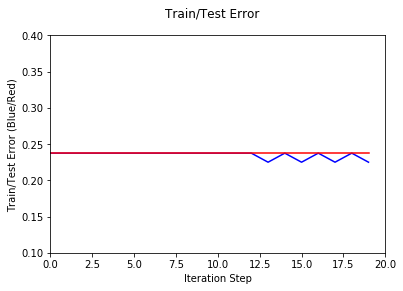

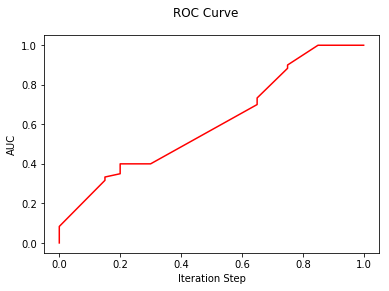

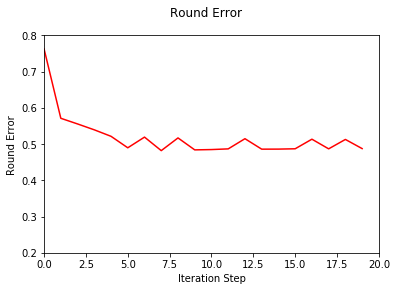

In [12]:
df = pd.read_csv('mod.csv', header = None)
n = df.shape[1] - 1
updlabel = df[n].values
for i in range(len(updlabel)):
    if updlabel[i] == 0:
        updlabel[i] = -1
df[n] = updlabel
train_X = pd.DataFrame()
train_y = pd.DataFrame()
test_X = pd.DataFrame()
test_y = pd.DataFrame()
for i in range(len(df)):
    if i%5 != 0:
        train_X = pd.concat([train_X, df.iloc[[i]]])
        train_y = pd.concat([train_y, df.iloc[[i]][n]])
    else:
        test_X = pd.concat([test_X, df.iloc[[i]]])
        test_y = pd.concat([test_y, df.iloc[[i]][n]])
del train_X[n]
del test_X[n]
model = AdaBoost(20)
model.adaboost(train_X, train_y, test_X, test_y)
model.plot_train_test_error()
model.plot_ROC_curve()
model.plot_round_error()

# Comparing the two models :-

In [13]:
print('Accuracy of KNN =',acc,'%')
print('Accuracy of AdaBoost =',acc1,'%')

Accuracy of KNN = 93.33333333333333 %
Accuracy of AdaBoost = 76.19047619047619 %
